$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
\def\Z{\mathbb{Z}}
\def\R{\mathbb{R}}
\def\T{\mathbb{T}}
\def\bx{\boldsymbol{x}}
\def\bn{\boldsymbol{n}}
\def\Ucal{\mathcal{U}}
\def\Vcal{\mathcal{V}}
\def\Wcal{\mathcal{W}}
\def\Pcal{\mathcal{P}}
\def\Xcal{\mathcal{X}}
\def\be{\mathbf{e}}
$$
# Calcul de la structure substitutive de sous-décalages apériodiques de type fini avec SageMath 

Sébastien Labbé, CNRS, LaBRI, Université de Bordeaux

Rencontre SDA2 2020, 4 décembre 2020, https://sda2-2020.sciencesconf.org/

*SPACE BAR = next slide, SHIFT + SPACE = previous slide, ESC = overview*

# The subshift $\Omega_\Ucal$

First we define the set $\Ucal$ of Wang tiles in SageMath and the Wang shift $\Omega_\Ucal\subseteq[0,18]^{\mathbb{Z}^2}$.

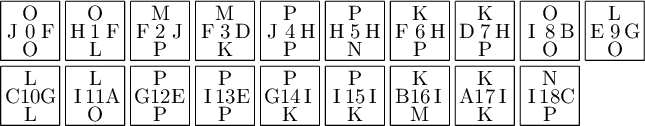

In [1]:
from slabbe import WangTileSet
tiles = ["FOJO", "FOHL", "JMFP", "DMFK", "HPJP", "HPHN", "HKFP", "HKDP", 
         "BOIO", "GLEO", "GLCL", "ALIO", "EPGP", "EPIP", "IPGK", "IPIK",
         "IKBM", "IKAK", "CNIP"]
U = WangTileSet([tuple(tile) for tile in tiles])
U.tikz()

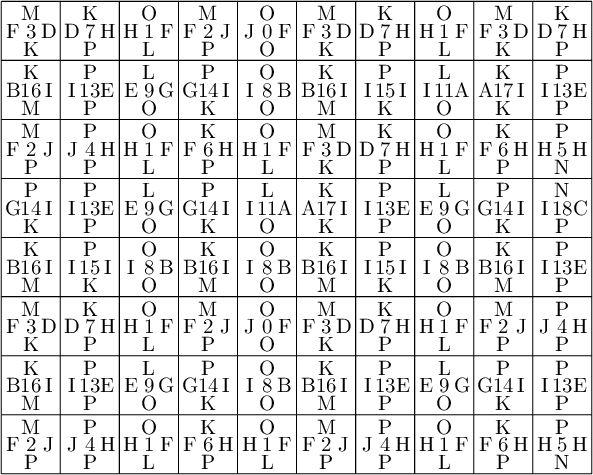

In [2]:
tiling = U.solver(10,8).solve(solver='glucose')
tiling.tikz()

In [3]:
None

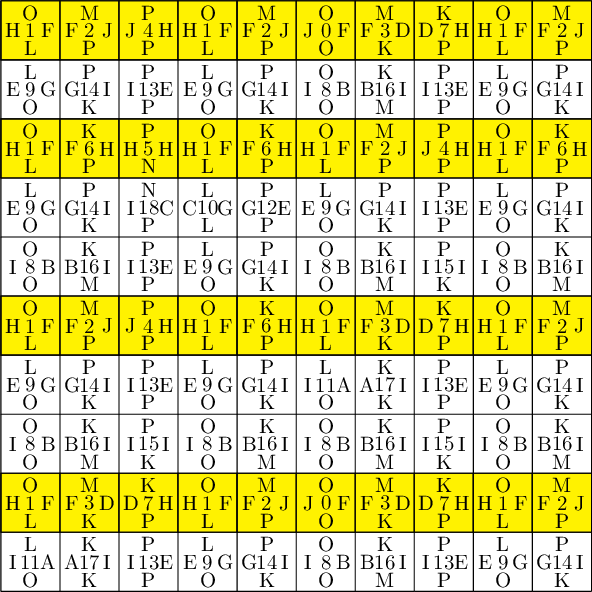

In [4]:
tiling = U.solver(10,10).solve(solver='glucose')
lines = []
for x,y in tiling.tile_positions(M=[0, 1, 2, 3, 4, 5, 6, 7]):
    lines.append(f'\\draw[fill=yellow] ({x},{y}) rectangle ({x+1},{y+1});')
tiling.tikz(extra_before='\n'.join(lines))

In [5]:
None

### Desubstitute $\Ucal$ with markers in the direction $\be_2$ 

to obtain the Wang shift $\Omega_\Vcal\subseteq[0,20]^{\mathbb{Z}^2}$.

In [6]:
U.find_markers(i=2,radius=2,solver="dancing_links")

[[0, 1, 2, 3, 4, 5, 6, 7]]

In [7]:
M = [0, 1, 2, 3, 4, 5, 6, 7]
V,alpha0 = U.find_substitution(M, i=2, radius=2, solver="dancing_links")

In [8]:
show(alpha0)

Substitution 2d: {0: [[8]], 1: [[9]], 2: [[11]], 3: [[13]], 4: [[14]], 5: [[15]], 6: [[16]], 7: [[17]], 8: [[8, 0]], 9: [[9, 1]], 10: [[10, 1]], 11: [[11, 1]], 12: [[12, 6]], 13: [[13, 4]], 14: [[13, 7]], 15: [[14, 2]], 16: [[14, 6]], 17: [[15, 7]], 18: [[16, 3]], 19: [[17, 3]], 20: [[18, 5]]}

We obtain $\Omega_\Ucal=\overline{\alpha_0(\Omega_\Vcal)}^\sigma$ 
with 2-dimensional morphism $\alpha_0:[0,20]\to[0,18]^{*^2}$

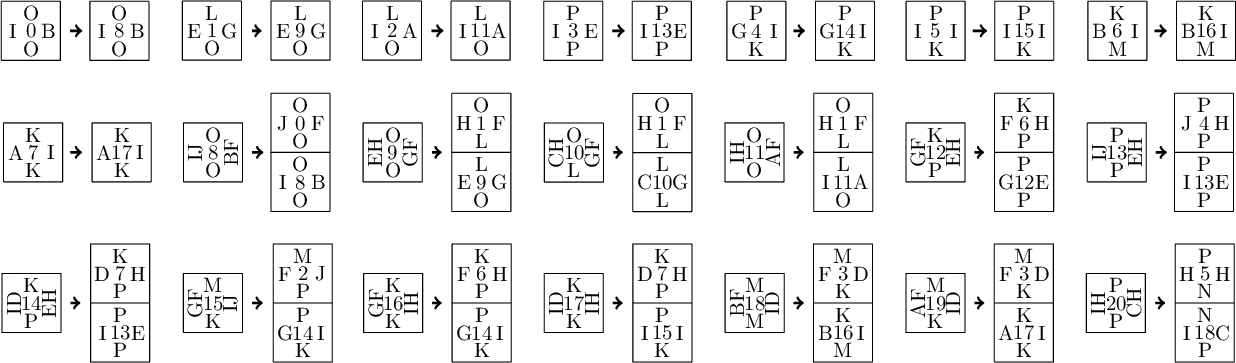

In [9]:
alpha0.wang_tikz(domain_tiles=V, codomain_tiles=U, ncolumns=7)

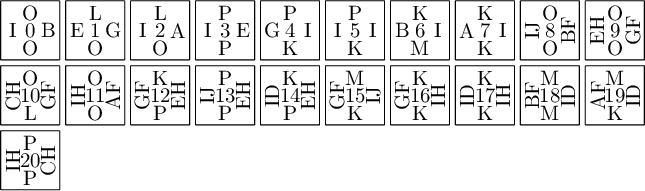

In [10]:
V.tikz()

# The subshift $\Omega_\Vcal$

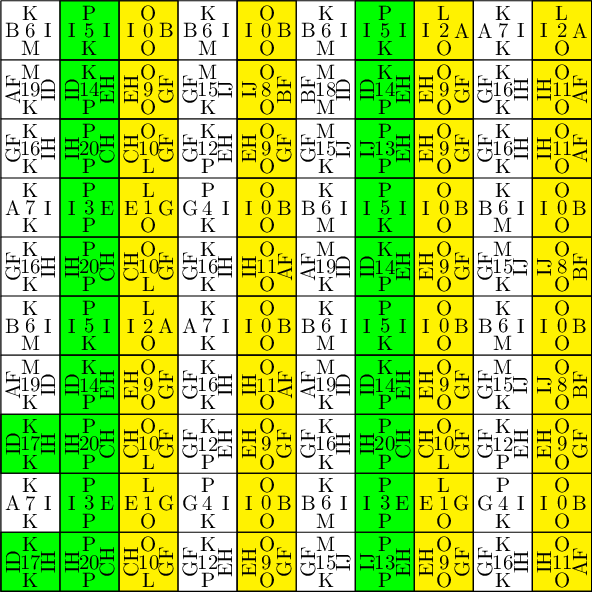

In [11]:
tiling = V.solver(10,10).solve(solver='glucose')
lines = []
for x,y in tiling.tile_positions(M=[0, 1, 2, 8, 9, 10, 11]):
    lines.append(f'\\draw[fill=yellow] ({x},{y}) rectangle ({x+1},{y+1});')
for x,y in tiling.tile_positions(M=[3, 5, 13, 14, 17, 20]):
    lines.append(f'\\draw[fill=green] ({x},{y}) rectangle ({x+1},{y+1});')
tiling.tikz(extra_before='\n'.join(lines))

In [12]:
None

### Desubstitute $\Vcal$ with markers in the direction $\be_1$ :

to obtain the Wang shift $\Omega_\Wcal\subseteq[0,18]^{\mathbb{Z}^2}$.

In [13]:
V.find_markers(i=1,radius=1,solver="dancing_links")

[[0, 1, 2, 8, 9, 10, 11],
 [3, 5, 13, 14, 17, 20],
 [4, 6, 7, 12, 15, 16, 18, 19]]

In [14]:
M = [0, 1, 2, 8, 9, 10, 11]
W,alpha1 = V.find_substitution(M, i=1, radius=1, solver="dancing_links")

In [15]:
show(alpha1)

Substitution 2d: {0: [[6]], 1: [[7]], 2: [[15]], 3: [[16]], 4: [[18]], 5: [[19]], 6: [[3], [1]], 7: [[4], [0]], 8: [[5], [0]], 9: [[5], [2]], 10: [[6], [0]], 11: [[7], [0]], 12: [[12], [9]], 13: [[13], [9]], 14: [[14], [9]], 15: [[15], [8]], 16: [[16], [11]], 17: [[17], [11]], 18: [[20], [10]]}

We obtain $\Omega_\Vcal=\overline{\alpha_1(\Omega_\Wcal)}^\sigma$ 
with 2-dimensional morphism $\alpha_1:[0,18]\to[0,20]^{*^2}$

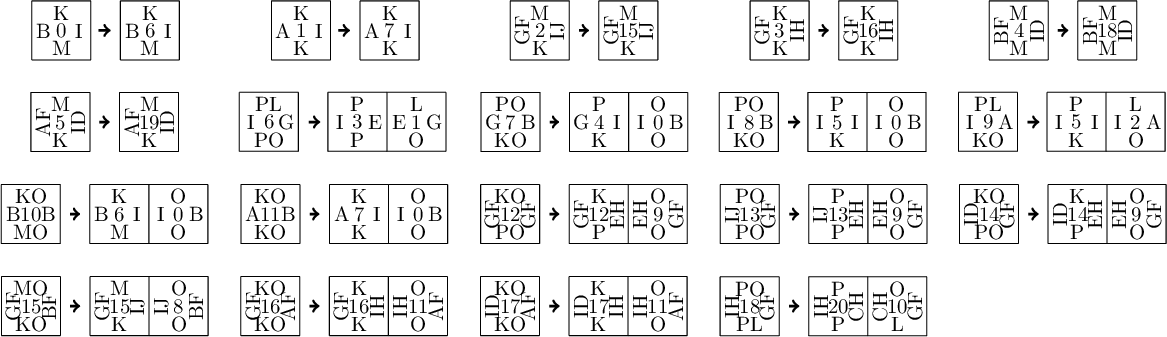

In [16]:
alpha1.wang_tikz(domain_tiles=W, codomain_tiles=V, ncolumns=5)

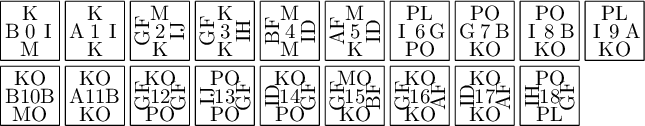

In [17]:
W.tikz()

# The subshift $\Omega_\Wcal$

It turns out that $\Ucal$ and $\Wcal$ are equivalent

In [18]:
W.is_equivalent(U)

True

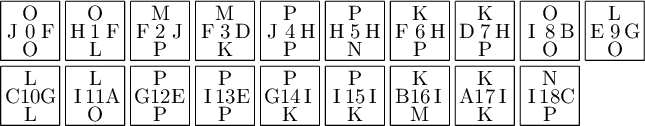

In [19]:
U.tikz()

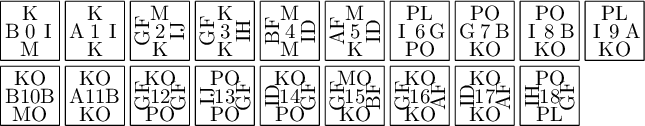

In [20]:
W.tikz()

The bijection between the vertical colors, between the horizontal colors and 
from $\Ucal$ to $\Wcal$ is computed as follows:

In [21]:
_,vert,horiz,alpha2 = U.is_equivalent(W, certificate=True)
vert 

{'J': 'A',
 'F': 'I',
 'H': 'B',
 'D': 'G',
 'I': 'GF',
 'B': 'IH',
 'A': 'IJ',
 'E': 'AF',
 'C': 'BF',
 'G': 'ID'}

In [22]:
horiz

{'O': 'K', 'L': 'M', 'P': 'KO', 'M': 'PL', 'K': 'PO', 'N': 'MO'}

We obtain $\Omega_\Wcal=\overline{\alpha_2(\Omega_\Ucal)}^\sigma$ 
word 2-dimensional morphism $\alpha_2:[0,18]\to[0,18]^{*^2}$

In [23]:
show(alpha2)

Substitution 2d: {0: [[1]], 1: [[0]], 2: [[9]], 3: [[6]], 4: [[11]], 5: [[10]], 6: [[8]], 7: [[7]], 8: [[3]], 9: [[5]], 10: [[4]], 11: [[2]], 12: [[17]], 13: [[16]], 14: [[14]], 15: [[12]], 16: [[18]], 17: [[13]], 18: [[15]]}

# Self-similarity of $\Omega_\Ucal$

Let $\phi = \alpha_0\circ\alpha_1\circ\alpha_2$

In [24]:
Phi = alpha0 * alpha1 * alpha2
show(Phi)

Substitution 2d: {0: [[17]], 1: [[16]], 2: [[15], [11]], 3: [[13], [9]], 4: [[17], [8]], 5: [[16], [8]], 6: [[15], [8]], 7: [[14], [8]], 8: [[14, 6]], 9: [[17, 3]], 10: [[16, 3]], 11: [[14, 2]], 12: [[15, 7], [11, 1]], 13: [[14, 6], [11, 1]], 14: [[13, 7], [9, 1]], 15: [[12, 6], [9, 1]], 16: [[18, 5], [10, 1]], 17: [[13, 4], [9, 1]], 18: [[14, 2], [8, 0]]}

This proves that $\Omega_\Ucal$ is self-similar:

$$\Omega_\Ucal
    =\overline{\alpha_0(\Omega_\Vcal)}^\sigma
    =\overline{\alpha_0\alpha_1(\Omega_\Wcal)}^\sigma
    =\overline{\alpha_0\alpha_1\alpha_2(\Omega_\Ucal)}^\sigma
    =\overline{\phi(\Omega_\Ucal)}^\sigma.$$
    
Also $\phi$ is onto up to a shift and recognizable. Thus $\Omega_\Ucal$ is aperiodic.

 
Moreover, one can prove (from the study of $2\times 2$ factors) that there is a unique subshift $X$ such that $X=\overline{\phi(X)}^\sigma$. Thus we now have 2 equivalent characterization for the subshift $\Omega_\Ucal\subseteq[0,18]^{\mathbb{Z}^2}$:
 - as a Wang shift $\Omega_\Ucal$
 - as the substitutive shift $\Xcal_\phi$

# $\Omega_\Ucal$ is hiding in Jeandel-Rao tilings

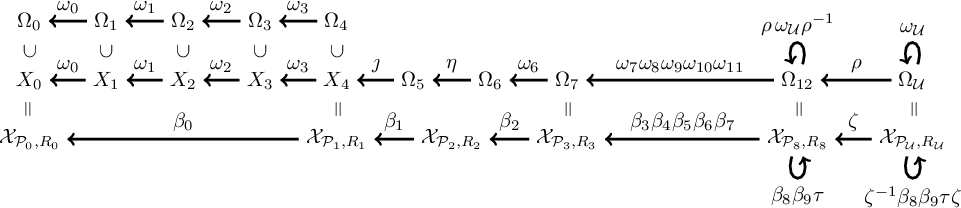

In [25]:
from slabbe import TikzPicture
with open('figure4.tex','r') as f: 
    s = f.read()
TikzPicture(s)

- A self-similar aperiodic set of 19 Wang tiles, Geometriae Dedicata 201 (2019) 81-109,https://doi.org/10.1007/s10711-018-0384-8, http://arxiv.org/abs/1802.03265
- Substitutive structure of Jeandel-Rao aperiodic tilings. *Discrete Comput. Geom.*, 2019, https://doi.org/10.1007/s00454-019-00153-3, http://arxiv.org/abs/1808.07768v4
- Rauzy induction of polygon partitions and toral $\mathbb{Z}^2$-rotations. https://arxiv.org/abs/1906.01104v2

## A 3rd characterization of $\Omega_\Ucal$ as coding of $\Z^2$-rotations on a torus

There is also a third equivalent characterization of the same subshift $\Omega_\Ucal$:
 - as $\Xcal_{\Pcal_\Ucal,R_\Ucal}\subseteq[0,18]^{\Z^2}$, i.e., the coding of toral $\mathbb{Z}^2$-rotation $R_\Ucal$ under a polygonal partition $\Pcal_\Ucal$ into 19 atoms of the torus $\T^2=\R^2/\Z^2$
 
whose substitutive structure is described using 2-dimensional Rauzy induction of $\mathbb{Z}^2$-action on the torus.

Details will be part of a chapter *Three characterizations of a self-similar aperiodic 2-dimensional subshift* part of a (french + english) book on the thematics of SDA2 edited by Nathalie Aubrun and Michael Rao. I will put my chapter on arxiv soon.

## Results

Let $R_\Ucal$ be the continuous $\Z^2$-action defined
on $\T^2$ by $R_\Ucal^\bn(\bx)=\bx + \varphi^{-2}\bn$
for every $\bn\in\Z^2$ where $\varphi=\frac{1+\sqrt{5}}{2}$.
It defines a dynamical system that we denote
$(\T^2, \Z^2, R_\Ucal)$. The coding by the partition 
defines a symbolic dynamical system
$(\Xcal_{\Pcal_\Ucal,R_\Ucal},\Z^2,\sigma)$ where $\Xcal_{\Pcal_\Ucal,R_\Ucal}\subseteq[0,18]^{\Z^2}$.

**Theorem**
    The Wang shift $\Omega_\Ucal$ has the following properties:
 - (i) the subshift $\Xcal_{\Pcal_\Ucal,R_\Ucal}$ is minimal, aperiodic and is equal to $\Omega_\Ucal$,
 - (ii) $\Pcal_\Ucal$ is a Markov partition for the dynamical system $(\T^2,\Z^2,R_\Ucal)$,
 - (iii) $(\T^2,\Z^2,R_\Ucal)$ is the maximal equicontinuous
factor of $(\Omega_\Ucal,\Z^2,\sigma)$,
 - (iv) the set of fiber cardinalities of the factor map
$\Omega_\Ucal\to\T^2$ is $\{1,2,8\}$,
 - (v) the dynamical system $(\Omega_\Ucal,\Z^2,\sigma)$ is strictly
    ergodic and the measure-preserving dynamical system $(\Omega_\Ucal,\Z^2,\sigma,\nu)$
    is isomorphic 
    to $(\T^2,\Z^2,R_\Ucal,\lambda)$ 
    where $\nu$ is the unique shift-invariant probability measure on
$\Omega_\Ucal$ and $\lambda$ is the Haar measure on $\T^2$.

## Results

**Theorem**
    There exists a 4-to-2 cut and project scheme such that
    for every configuration $w\in\Omega_\Ucal$,
    the set $Q\subseteq\Z^2$ of occurrences of a pattern in $w$
    is a regular model set.
    If $w$ is a generic (resp. singular) configuration,
    then $Q$ is a generic (resp. singular) model set.


**References:**

- Markov partitions for toral $\mathbb{Z}^2$-rotations featuring Jeandel-Rao Wang shift and model sets. April 2020. to appear in *Annales Henri Lebesgue*. http://arxiv.org/abs/1903.06137v3

# Comparison of SAT, MILP et Knuth's dancing links solvers

In the proof, we used Knuth's dancing links algorithm to find markers because it is faster at this particular task than the MILP solver Gurobi or the SAT solver Glucose as we can see below:

In [26]:
U.find_markers(i=2,radius=2,solver="dancing_links") # long time (3s)

[[0, 1, 2, 3, 4, 5, 6, 7]]

In [27]:
#U.find_markers(i=2,radius=2,solver="gurobi") # long time (13s) # optional gurobi

In [28]:
#U.find_markers(i=2,radius=2,solver="glucose") # long time (2min 10s) # optional glucose

Note that for other tasks like finding a valid tiling an $n\times n$
square with Wang tiles, the Glucose SAT solver (developped at LaBRI) based on MiniSAT is faster than Knuth's dancing links algorithm or MILP solvers.

See: http://www.slabbe.org/blogue/2018/12/comparison-of-wang-tiling-solvers

## Code

- PyPI: https://pypi.org/project/slabbe/
- documentation: http://www.slabbe.org/docs/
- gitlab: http://gitlab.com/seblabbe/slabbe

**Installation**:

    sage -pip install slabbe